#Maestría en "Analítica de datos"
----
Nombre:María Paula Barrero Montealegre
---
Código:
----
Fecha: 2025 agosto 21
----
Descripción:

# 1. Ejercicio 1: Cargar y visualizar datos en Pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url="/content/drive/MyDrive/Clase_Big_Data/Historial_de_Multas_reportados_en_el_SIMIT_-_FCM_20250821.csv"
df=pd.read_csv(url)

##1.1 Conocer la data

In [ ]:
pd.set_option('display.max_columns', None) #muestra la tabla sin importar la cantidad de columnas
print(df.head(50).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA    DEPARTAMENTO        CIUDAD PAGADO_SI_NO
     2019 MIK715  25/01/2019     414,058       Santander   Bucaramanga           SI
     2020 IBF96B  11/02/2020           0            Meta Villavicencio           SI
     2020 AUW697  08/12/2020     877,803           Cauca    Mercaderes           NO
     2019 FCW577  11/03/2019     414,060       Antioquia      Medellin           SI
     2019 EVL11D  24/08/2019           0       Antioquia     Chigorodo           NO
     2021 FOR75D  09/08/2021     149,185 Valle del Cauca          Cali           SI
     2019 XKX76A  04/10/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 ELA11D  27/03/2019     414,060       Antioquia      Medellin           SI
     2019 TAY686  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100     Bogota D.C.   Bogota D.C.      

In [ ]:
#mostrar la metadata (como esta clasificados los datos)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25234188 entries, 0 to 25234187
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   object
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(1), object(6)
memory usage: 1.3+ GB
None


#2. Filtrado y selección

In [ ]:
#Seleccionar Bogtá para el ejercicio de clase
df_bogota=df[df["DEPARTAMENTO"]=="Bogota D.C."]

print(df_bogota.head(20).to_string(index=False))
print(f"la cantidad de registros de Bogota D.C es {df_bogota.shape[0]}")

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA DEPARTAMENTO      CIUDAD PAGADO_SI_NO
     2019 XKX76A  04/10/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 TAY686  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100  Bogota D.C. Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 JFK618  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 VDM981  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2020 IKX489  22/09/2020     234,100  Bogota D.C. Bogota D.C.           NO
     2021 EQZ167  01/03/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2021 IAU451  01/03/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2021 FNO652  15/10/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2019 AIQ94F  06/05/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2020 CDP093  15/01/2020     438,900  Bogota D.C

#2.1 Conocer la data

In [ ]:
#obtener los datos unicos de las vigencias
print(df_bogota["VIGENCIA"].unique())


[2019 2020 2021 2023 2022]


In [ ]:
#verificar si tenemos datos nulos
print(df_bogota.isnull().sum())
#eliminar filas con valores nulos (si existieran)
#df_bogota.dropna(inplace=True)

VIGENCIA          0
PLACA           112
FECHA_MULTA       0
VALOR_MULTA       0
DEPARTAMENTO      0
CIUDAD            0
PAGADO_SI_NO      0
dtype: int64


# 3. ETL
Limpieza y transformación de los datos:
1. borrado de registros con datos nulos,
2. Crear nuevas columnas.
3. Transformar columnas en datos reconocidos (numeros/texto/fechas/listas)

In [ ]:
df_bogota["VALOR_MULTA"]=df_bogota["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)
df_bogota["VALOR_MULTA"]=pd.to_numeric(df_bogota["VALOR_MULTA"], errors='coerce')
print(df_bogota.info())

/tmp/ipython-input-1708708637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota["VALOR_MULTA"]=df_bogota["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)


<class 'pandas.core.frame.DataFrame'>
Index: 3871898 entries, 6 to 19958139
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   int64 
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(2), object(5)
memory usage: 236.3+ MB
None


/tmp/ipython-input-1708708637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota["VALOR_MULTA"]=pd.to_numeric(df_bogota["VALOR_MULTA"], errors='coerce')


In [ ]:
print(df_bogota.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO      CIUDAD PAGADO_SI_NO
     2019 XKX76A  04/10/2019       414100  Bogota D.C. Bogota D.C.           SI
     2019 TAY686  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI
     2019 BPI174  13/03/2019       414100  Bogota D.C. Bogota D.C.           NO
     2019 FLM417  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI
     2019 JFK618  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI
     2019 VDM981  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI
     2020 IKX489  22/09/2020       234100  Bogota D.C. Bogota D.C.           NO
     2021 EQZ167  01/03/2021       447700  Bogota D.C. Bogota D.C.           SI
     2021 IAU451  01/03/2021       447700  Bogota D.C. Bogota D.C.           SI
     2021 FNO652  15/10/2021       447700  Bogota D.C. Bogota D.C.           SI
     2019 AIQ94F  06/05/2019       414100  Bogota D.C. Bogota D.C.           SI
     2020 CDP093  15/01/2020       43890

# 4. Agregación y estadisticas descriptivas


*   (filtros/acumulados)
*   funciones básicas de panda



In [ ]:
#estadisticas descriptivas con VALOR_MULTA
with pd.option_context('display.float_format', '{:.2f}'.format):
  print(df_bogota["VALOR_MULTA"].describe())

#calcular el promedio de multas por vigencia (año)
multas_promedio_por_vigencia = df_bogota.groupby("VIGENCIA")["VALOR_MULTA"].mean()
print(multas_promedio_por_vigencia)

count    3871898.00
mean      503016.94
std       213851.70
min            0.00
25%       438900.00
50%       468500.00
75%       522900.00
max     39749600.00
Name: VALOR_MULTA, dtype: float64
VIGENCIA
2019    422810.607262
2020    452831.633270
2021    474441.471548
2022    512833.481526
2023    570499.032588
Name: VALOR_MULTA, dtype: float64


# 5. Análisis avanzados

In [ ]:
# tabla para ver el porcentajes de multas pagadas (si/no) por vigencia
multas_count = df_bogota.groupby(["VIGENCIA", "PAGADO_SI_NO"]).size().unstack(fill_value=0)
multas_count["total"] = multas_count.sum(axis=1)
multas_porcentaje = multas_count.div(multas_count["total"], axis=0) * 100
print("porcentaje de multas pagadas por vigencia(año)")
print(multas_porcentaje)


porcentaje de multas pagadas por vigencia(año)
PAGADO_SI_NO         NO         SI  total
VIGENCIA                                 
2019          18.756310  81.243690  100.0
2020          36.388183  63.611817  100.0
2021          46.878995  53.121005  100.0
2022          52.303577  47.696423  100.0
2023          53.837937  46.162063  100.0


# 6. Visualización de los datos
matplolib y seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

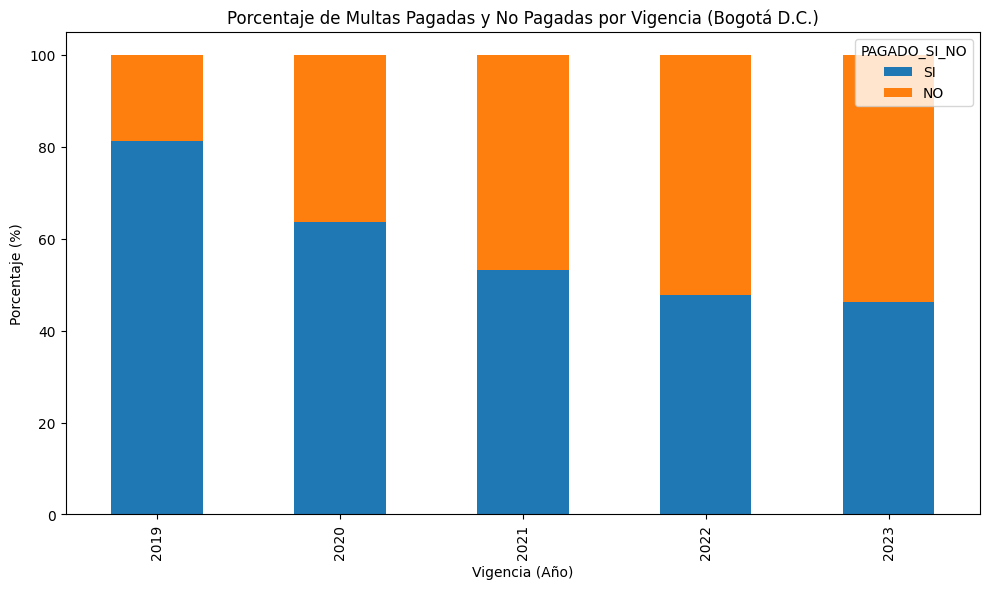

In [ ]:
multas_porcentaje[["SI","NO"]].plot(kind="bar",stacked=True, figsize=(10,6))
plt.title("Porcentaje de Multas Pagadas y No Pagadas por Vigencia (Bogotá D.C.)")
plt.xlabel("Vigencia (Año)")
plt.ylabel("Porcentaje (%)")
plt.tight_layout()
plt.show()

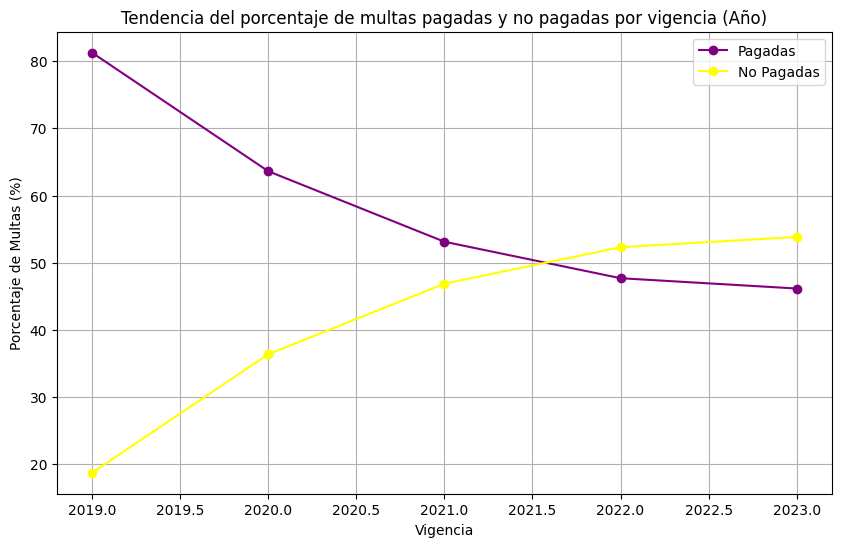

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(multas_porcentaje.index, multas_porcentaje["SI"], marker='o', color='purple', label='Pagadas')
plt.plot(multas_porcentaje.index, multas_porcentaje["NO"], marker='o', color='yellow', label='No Pagadas')
plt.title("Tendencia del porcentaje de multas pagadas y no pagadas por vigencia (Año)")
plt.xlabel("Vigencia")
plt.ylabel("Porcentaje de Multas (%)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Seleccionar Bogtá para el ejercicio de clase
df_tolima=df[df["DEPARTAMENTO"]=="Tolima"]

print(df_tolima.head(20).to_string(index=False))
print(f"la cantidad de registros de Tolima es {df_tolima.shape[0]}")

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA DEPARTAMENTO            CIUDAD PAGADO_SI_NO
     2020 ZEX71E  16/08/2020     877,800       Tolima            Ibague           SI
     2021 SAF29D  09/12/2021     149,185       Tolima            Ibague           NO
     2019 DZY244  09/03/2019     828,116       Tolima          Alvarado           SI
     2019 EQX94B  18/06/2019     828,116       Tolima Guayabal (Armero)           NO
     2019 USE859  27/09/2019     828,120       Tolima             Guamo           SI
     2019 KCM194  18/06/2019     220,831       Tolima Guayabal (Armero)           SI
     2020 OOS47C  16/08/2020     438,900       Tolima            Ibague           NO
     2019 CFV148  01/08/2019     414,060       Tolima            Ibague           NO
     2019 MJY98E  28/04/2019     414,060       Tolima             Guamo           SI
     2019 BOD660  25/06/2019     414,060       Tolima            Ibague           SI
     2019 EPM711  28/06/2019     828,120       Tolima Guayabal (A

In [ ]:
#obtener los datos unicos de las vigencias
print(df_tolima["VIGENCIA"].unique())


[2020 2021 2019 2022 2023]


In [ ]:
#verificar si tenemos datos nulos
print(df_tolima.isnull().sum())
#eliminar filas con valores nulos (si existieran)
#df_bogota.dropna(inplace=True)

VIGENCIA         0
PLACA           10
FECHA_MULTA      0
VALOR_MULTA      0
DEPARTAMENTO     0
CIUDAD           0
PAGADO_SI_NO     0
dtype: int64


In [ ]:
df_tolima["VALOR_MULTA"]=df_tolima["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)
df_tolima["VALOR_MULTA"]=pd.to_numeric(df_tolima["VALOR_MULTA"], errors='coerce')
print(df_tolima.info())

<class 'pandas.core.frame.DataFrame'>
Index: 183156 entries, 40 to 19956051
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   VIGENCIA      183156 non-null  int64 
 1   PLACA         183146 non-null  object
 2   FECHA_MULTA   183156 non-null  object
 3   VALOR_MULTA   183156 non-null  int64 
 4   DEPARTAMENTO  183156 non-null  object
 5   CIUDAD        183156 non-null  object
 6   PAGADO_SI_NO  183156 non-null  object
dtypes: int64(2), object(5)
memory usage: 11.2+ MB
None


/tmp/ipython-input-2800074270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tolima["VALOR_MULTA"]=df_tolima["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)
/tmp/ipython-input-2800074270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tolima["VALOR_MULTA"]=pd.to_numeric(df_tolima["VALOR_MULTA"], errors='coerce')


In [ ]:
print(df_tolima.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO            CIUDAD PAGADO_SI_NO
     2020 ZEX71E  16/08/2020       877800       Tolima            Ibague           SI
     2021 SAF29D  09/12/2021       149185       Tolima            Ibague           NO
     2019 DZY244  09/03/2019       828116       Tolima          Alvarado           SI
     2019 EQX94B  18/06/2019       828116       Tolima Guayabal (Armero)           NO
     2019 USE859  27/09/2019       828120       Tolima             Guamo           SI
     2019 KCM194  18/06/2019       220831       Tolima Guayabal (Armero)           SI
     2020 OOS47C  16/08/2020       438900       Tolima            Ibague           NO
     2019 CFV148  01/08/2019       414060       Tolima            Ibague           NO
     2019 MJY98E  28/04/2019       414060       Tolima             Guamo           SI
     2019 BOD660  25/06/2019       414060       Tolima            Ibague           SI
     2019 EPM711  28/06/2019       828120       Tolima

In [ ]:
#estadisticas descriptivas con VALOR_MULTA
with pd.option_context('display.float_format', '{:.2f}'.format):
  print(df_tolima["VALOR_MULTA"].describe())

#calcular el promedio de multas por vigencia (año)
multas_promedio_por_vigencia = df_tolima.groupby("VIGENCIA")["VALOR_MULTA"].mean()
print(multas_promedio_por_vigencia)

count     183156.00
mean      679273.24
std      1887568.54
min            0.00
25%       414060.00
50%       468449.00
75%       828116.00
max     56215667.00
Name: VALOR_MULTA, dtype: float64
VIGENCIA
2019    599488.761053
2020    588829.027060
2021    709326.997936
2022    745059.707182
2023    815257.446561
Name: VALOR_MULTA, dtype: float64


In [ ]:
# tabla para ver el porcentajes de multas pagadas (si/no) por vigencia
multas_count_tolima = df_tolima.groupby(["VIGENCIA", "PAGADO_SI_NO"]).size().unstack(fill_value=0)
multas_count_tolima["total"] = multas_count_tolima.sum(axis=1)
multas_porcentaje_tolima = multas_count_tolima.div(multas_count["total"], axis=0) * 100
print("porcentaje de multas pagadas por vigencia(año)")
print(multas_porcentaje_tolima)

porcentaje de multas pagadas por vigencia(año)
PAGADO_SI_NO         NO         SI  total
VIGENCIA                                 
2019          23.737603  76.262397  100.0
2020          27.707383  72.292617  100.0
2021          27.682202  72.317798  100.0
2022          32.507939  67.492061  100.0
2023          36.426551  63.573449  100.0


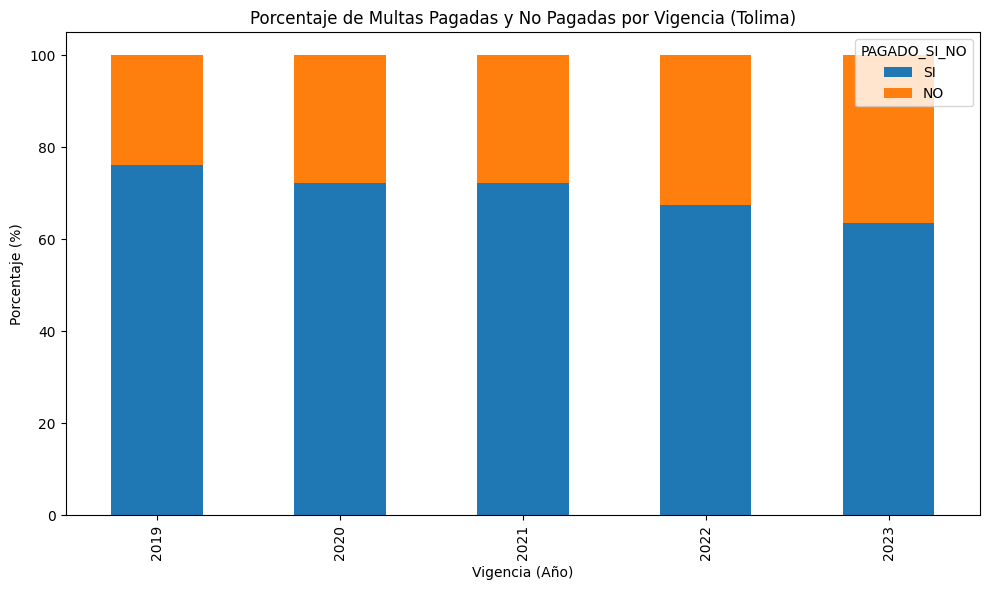

In [ ]:
multas_porcentaje_tolima[["SI","NO"]].plot(kind="bar",stacked=True, figsize=(10,6))
plt.title("Porcentaje de Multas Pagadas y No Pagadas por Vigencia (Tolima)")
plt.xlabel("Vigencia (Año)")
plt.ylabel("Porcentaje (%)")
plt.tight_layout()
plt.show()

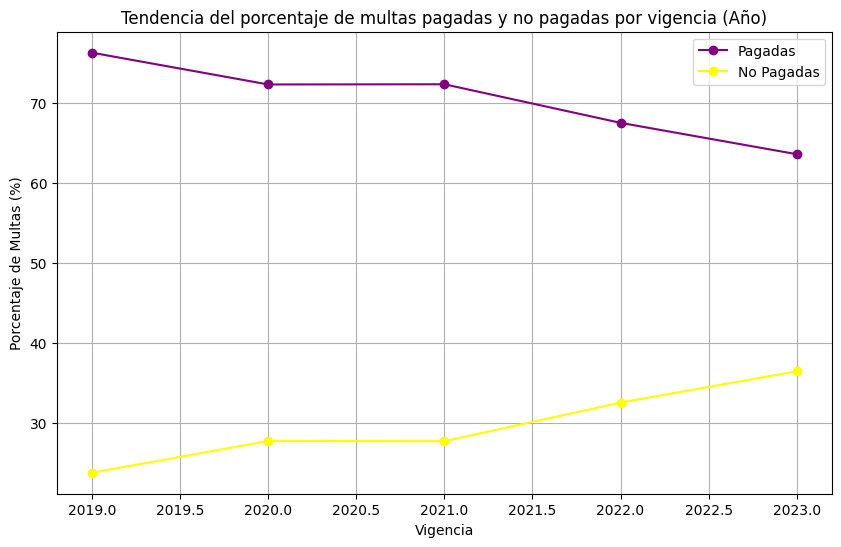

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(multas_porcentaje_tolima.index, multas_porcentaje_tolima["SI"], marker='o', color='purple', label='Pagadas')
plt.plot(multas_porcentaje_tolima.index, multas_porcentaje_tolima["NO"], marker='o', color='yellow', label='No Pagadas')
plt.title("Tendencia del porcentaje de multas pagadas y no pagadas por vigencia (Año)")
plt.xlabel("Vigencia")
plt.ylabel("Porcentaje de Multas (%)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Seleccionar Bogtá para el ejercicio de clase
df_ibague=df[df["CIUDAD"]=="Ibague"]

print(df_ibague.head(20).to_string(index=False))
print(f"la cantidad de registros de Ibague es {df_ibague.shape[0]}")

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA DEPARTAMENTO CIUDAD PAGADO_SI_NO
     2020 ZEX71E  16/08/2020     877,800       Tolima Ibague           SI
     2021 SAF29D  09/12/2021     149,185       Tolima Ibague           NO
     2020 OOS47C  16/08/2020     438,900       Tolima Ibague           NO
     2019 CFV148  01/08/2019     414,060       Tolima Ibague           NO
     2019 BOD660  25/06/2019     414,060       Tolima Ibague           SI
     2019 DEY469  25/06/2019     414,060       Tolima Ibague           SI
     2019 WTM532  03/07/2019     414,060       Tolima Ibague           SI
     2019 MWO221  25/06/2019     414,060       Tolima Ibague           SI
     2019 EXX443  02/12/2019     414,060       Tolima Ibague           SI
     2019 IGY410  18/07/2019     414,060       Tolima Ibague           SI
     2019 IBS731  17/07/2019     414,060       Tolima Ibague           SI
     2019 TRN09D  04/12/2019     220,832       Tolima Ibague           SI
     2019 DVT327  20/03/2019     414,0

In [ ]:
#obtener los datos unicos de las vigencias
print(df_ibague["VIGENCIA"].unique())

[2020 2021 2019 2022 2023]


In [ ]:
#verificar si tenemos datos nulos
print(df_ibague.isnull().sum())
#eliminar filas con valores nulos (si existieran)
#df_bogota.dropna(inplace=True)

VIGENCIA        0
PLACA           0
FECHA_MULTA     0
VALOR_MULTA     0
DEPARTAMENTO    0
CIUDAD          0
PAGADO_SI_NO    0
dtype: int64


In [ ]:
df_ibague["VALOR_MULTA"]=df_ibague["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)
df_ibague["VALOR_MULTA"]=pd.to_numeric(df_ibague["VALOR_MULTA"], errors='coerce')
print(df_ibague.info())

<class 'pandas.core.frame.DataFrame'>
Index: 83953 entries, 40 to 19955807
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   VIGENCIA      83953 non-null  int64 
 1   PLACA         83953 non-null  object
 2   FECHA_MULTA   83953 non-null  object
 3   VALOR_MULTA   83953 non-null  int64 
 4   DEPARTAMENTO  83953 non-null  object
 5   CIUDAD        83953 non-null  object
 6   PAGADO_SI_NO  83953 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.1+ MB
None


/tmp/ipython-input-4172137235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibague["VALOR_MULTA"]=df_ibague["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)
/tmp/ipython-input-4172137235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibague["VALOR_MULTA"]=pd.to_numeric(df_ibague["VALOR_MULTA"], errors='coerce')


In [ ]:
print(df_ibague.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO CIUDAD PAGADO_SI_NO
     2020 ZEX71E  16/08/2020       877800       Tolima Ibague           SI
     2021 SAF29D  09/12/2021       149185       Tolima Ibague           NO
     2020 OOS47C  16/08/2020       438900       Tolima Ibague           NO
     2019 CFV148  01/08/2019       414060       Tolima Ibague           NO
     2019 BOD660  25/06/2019       414060       Tolima Ibague           SI
     2019 DEY469  25/06/2019       414060       Tolima Ibague           SI
     2019 WTM532  03/07/2019       414060       Tolima Ibague           SI
     2019 MWO221  25/06/2019       414060       Tolima Ibague           SI
     2019 EXX443  02/12/2019       414060       Tolima Ibague           SI
     2019 IGY410  18/07/2019       414060       Tolima Ibague           SI
     2019 IBS731  17/07/2019       414060       Tolima Ibague           SI
     2019 TRN09D  04/12/2019       220832       Tolima Ibague           SI
     2019 DVT327  20/03/2

In [ ]:
#estadisticas descriptivas con VALOR_MULTA
with pd.option_context('display.float_format', '{:.2f}'.format):
  print(df_ibague["VALOR_MULTA"].describe())

#calcular el promedio de multas por vigencia (año)
multas_promedio_por_vigencia = df_ibague.groupby("VIGENCIA")["VALOR_MULTA"].mean()
print(multas_promedio_por_vigencia)

count      83953.00
mean      650568.61
std      1949342.05
min            0.00
25%       414060.00
50%       447555.00
75%       522795.00
max     50188320.00
Name: VALOR_MULTA, dtype: float64
VIGENCIA
2019    555933.268229
2020    576200.620534
2021    692573.271987
2022    655916.032102
2023    776269.991641
Name: VALOR_MULTA, dtype: float64


In [ ]:
# tabla para ver el porcentajes de multas pagadas (si/no) por vigencia
multas_count_ibague = df_ibague.groupby(["VIGENCIA", "PAGADO_SI_NO"]).size().unstack(fill_value=0)
multas_count_ibague["total"] = multas_count_ibague.sum(axis=1)
multas_porcentaje_ibague = multas_count_ibague.div(multas_count_ibague["total"], axis=0) * 100
print("porcentaje de multas pagadas por vigencia(año)")
print(multas_porcentaje_ibague)

porcentaje de multas pagadas por vigencia(año)
PAGADO_SI_NO         NO         SI  total
VIGENCIA                                 
2019          19.288582  80.711418  100.0
2020          25.583112  74.416888  100.0
2021          22.216810  77.783190  100.0
2022          27.920246  72.079754  100.0
2023          31.925839  68.074161  100.0


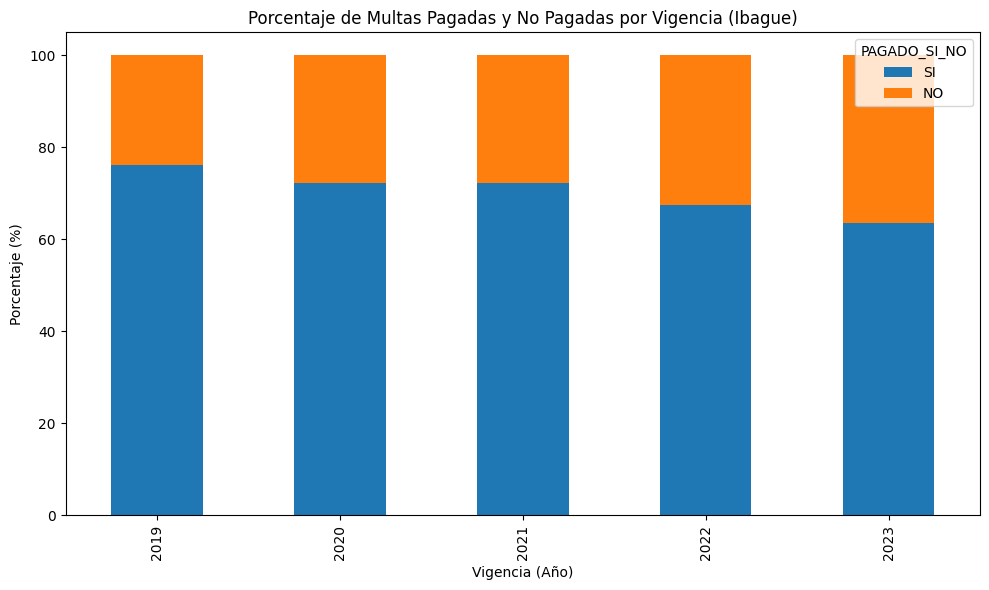

In [ ]:
multas_porcentaje_tolima[["SI","NO"]].plot(kind="bar",stacked=True, figsize=(10,6))
plt.title("Porcentaje de Multas Pagadas y No Pagadas por Vigencia (Ibague)")
plt.xlabel("Vigencia (Año)")
plt.ylabel("Porcentaje (%)")
plt.tight_layout()
plt.show()